In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the data
iris = sns.load_dataset('iris')

In [57]:
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [58]:
# target vector (y)-  something we wish to predict - vector[n_samples, 1]
# input variables (X) - features that we use to predict the target also called feature matrix - matrix[n_samples, n_features]

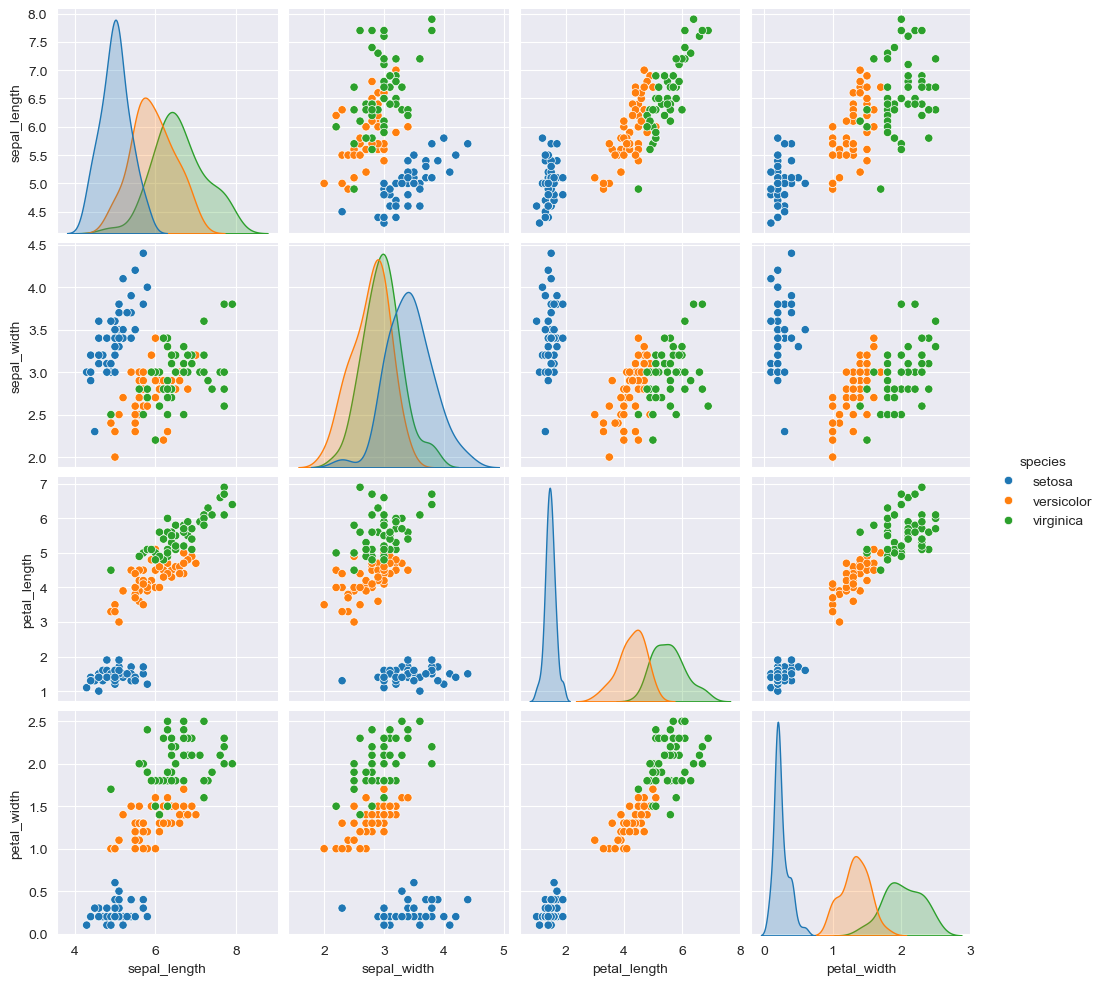

In [59]:
sns.pairplot(iris, hue='species')

In [60]:
# Input vector creation

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [61]:
y_iris = iris['species']
y_iris.shape

(150,)

In [62]:
# 1. Choose a class of model from scikit-learn
# 2. Choose model hyperparameters for your model
# 3. Arrange data into a features matrix and target vector
# 4. Fit the model to your data using the fit() method of the model instance
# 5. Apply the model to unseen data: For supervised learning, predict labels for unknown data using the predict() method, for unsupervised learning, transform or infer properties of the data using the transform() or predict() method

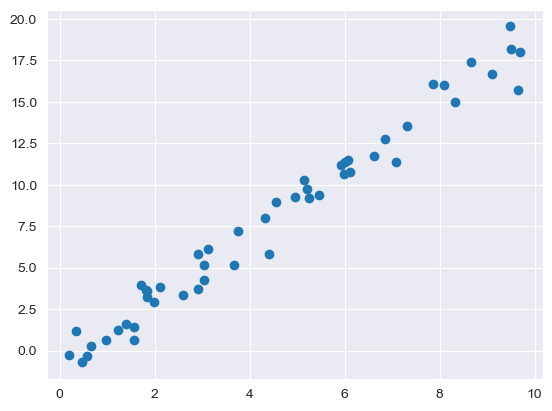

In [63]:
# ensure that the data is split in a random manner
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [66]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [67]:
model.fit(X, y)

LinearRegression()

In [68]:
model.coef_

array([1.9776566])

In [69]:
model.intercept_

-0.9033107255311164

In [70]:
xfit = np.linspace(-1, 11)

In [71]:
Xfit = xfit[:, np.newaxis]

In [72]:
yfit = model.predict(Xfit)

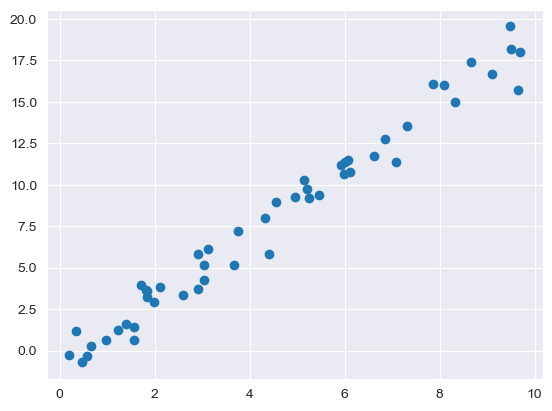

In [73]:
plt.scatter(x, y)

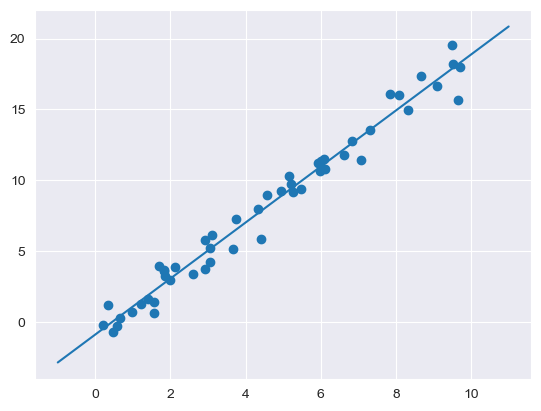

In [74]:
plt.plot(xfit, yfit)
plt.scatter(x, y)

In [75]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [76]:
# 1. Choose a class of model
from sklearn.naive_bayes import GaussianNB

In [77]:
# 2. Instantiate the model
model = GaussianNB()

In [78]:
# 3. Fit the model to data
model.fit(Xtrain, ytrain)

GaussianNB()

In [79]:
# 4. Predict on new data
y_model = model.predict(Xtest)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [81]:
# Principal Component Analysis

from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)

PCA(n_components=2)

In [82]:
X_2D = model.transform(X_iris)

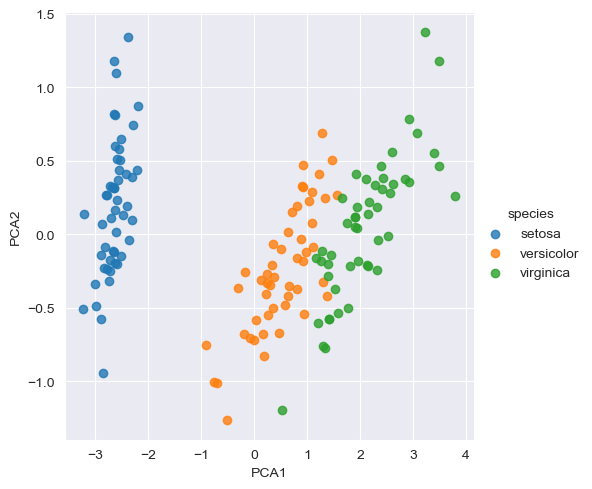

In [83]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

In [84]:
from sklearn.datasets import load_digits
digits = load_digits()

In [85]:
digits.images.shape

(1797, 8, 8)

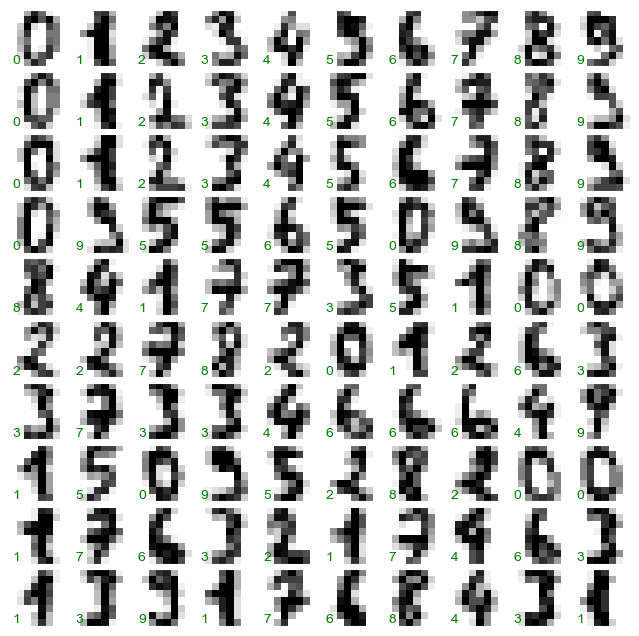

In [86]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
     subplot_kw={'xticks':[], 'yticks':[]},
     gridspec_kw=dict(hspace=0.1, wspace=0.1)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [87]:
X = digits.data
X.shape

(1797, 64)

In [88]:
y = digits.target
y.shape

(1797,)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [90]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [91]:
y_model = model.predict(X_test)

In [92]:
accuracy_score(y_test, y_model)

0.8333333333333334

Text(115.9222222222222, 0.5, 'true value')

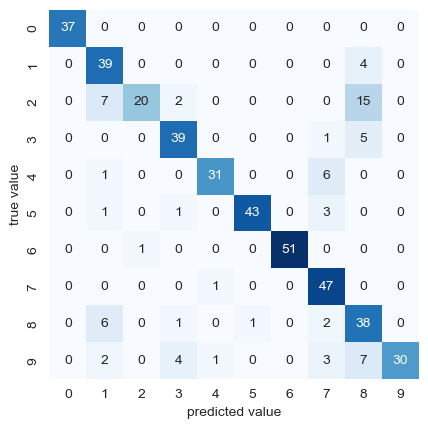

In [93]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [100]:
from sklearn.neighbors import KNeighborsClassifier
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(f'Test set score: {knn.score(X_test, y_test)}')

Test set score: 0.9777777777777777


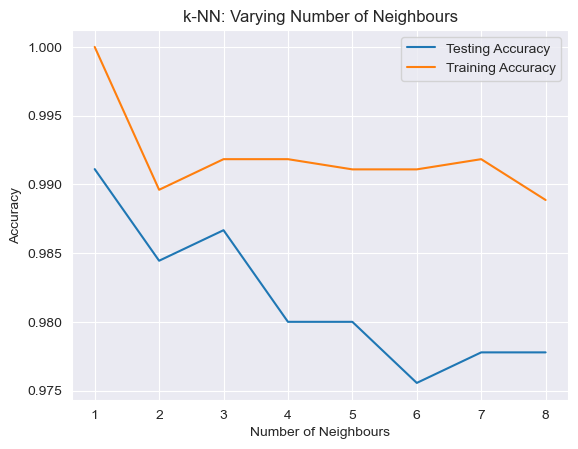

In [101]:
neighbours = np.arange(1, 9)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()